

### The goal is to understand why customers are leaving a subscription-based company and how we can predict churn.



## import the libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load The data sets

In [13]:
path="https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv"
df=pd.read_csv(path)
df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0
5,2014,1,1,37.0,82.0,747.0,88.0,DL,N806DN,1823,SEA,DTW,224.0,1927,0.0,37.0
6,2014,1,1,346.0,227.0,936.0,219.0,UA,N14219,1481,SEA,ORD,202.0,1721,3.0,46.0
7,2014,1,1,526.0,-4.0,1148.0,15.0,UA,N813UA,229,PDX,IAH,217.0,1825,5.0,26.0
8,2014,1,1,527.0,7.0,917.0,24.0,UA,N75433,1576,SEA,DEN,136.0,1024,5.0,27.0
9,2014,1,1,536.0,1.0,1334.0,-6.0,UA,N574UA,478,SEA,EWR,268.0,2402,5.0,36.0


## Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,162049.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0
month,162049.0,6.605027,3.324399,1.0,4.0,7.0,9.0,12.0
day,162049.0,15.749890,8.789417,1.0,8.0,16.0,23.0,31.0
dep_time,161192.0,1278.283755,522.583793,1.0,831.0,1217.0,1721.0,2400.0
dep_delay,161192.0,6.133859,29.112035,-37.0,-5.0,-2.0,5.0,1553.0
arr_time,161061.0,1482.501282,523.958781,1.0,1127.0,1517.0,1918.0,2400.0
arr_delay,160748.0,2.240868,31.191037,-67.0,-12.0,-4.0,7.0,1539.0
flight,162049.0,1357.356725,1495.271031,2.0,408.0,694.0,1726.0,6527.0
air_time,160748.0,152.588511,72.547469,18.0,103.0,129.0,199.0,422.0
distance,162049.0,1204.514634,653.150062,93.0,689.0,991.0,1660.0,2724.0


In [17]:
df.shape

(162049, 16)

In [ ]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

## EAD

In [28]:
#Find the busiest airline witn number of Flight
airlineCount=df['carrier'].value_counts().reset_index(0)
airlineCount.columns=['carrier',"Flight_count"]
airlineCount.head(10)



,carrier,Flight_count
0,AS,62460
1,WN,23355
2,OO,18710
3,DL,16716
4,UA,16671
5,AA,7586
6,US,5946
7,B6,3540
8,VX,3272
9,F9,2698


## visalize the 10 busisiest ailine

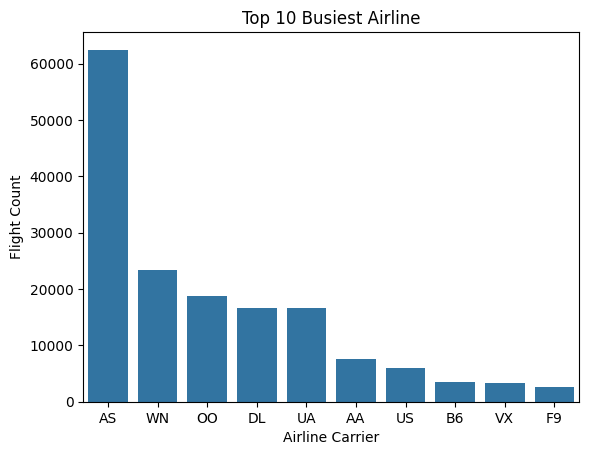

In [31]:
sns.barplot(x='carrier',y='Flight_count',data=airlineCount.head(10))
plt.xlabel("Airline Carrier")
plt.ylabel("Flight Count")
plt.title("Top 10 Busiest Airline")
plt.show()

## Analyze Top Routes (Origin–Destination

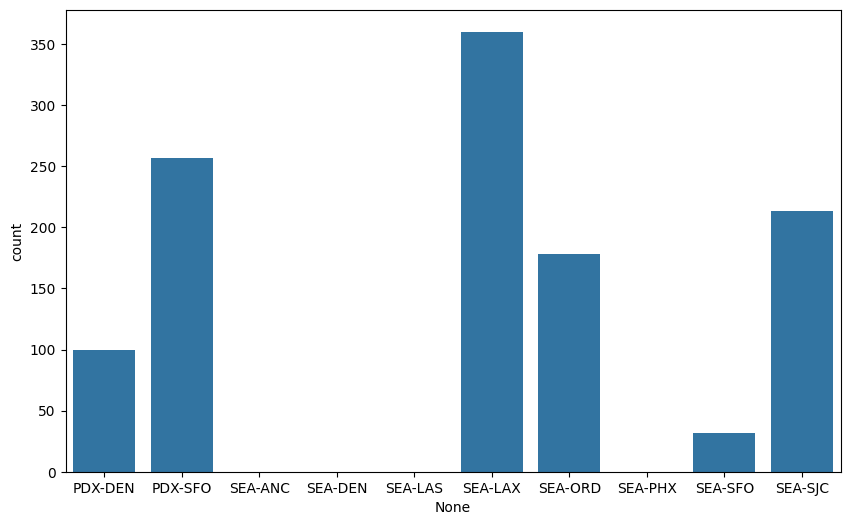

In [75]:
# Count top route pairs
flight_cout=df['flight'].value_counts()
top_routes=df.groupby(['origin','dest']).size().reset_index(name='flight_count')

top_routes = top_routes.sort_values(by='flight_count', ascending=False)
top_routes.head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=flight_cout,x=top_routes.head(10).apply(lambda x: f"{x.origin}-{x.dest}", axis=1))
plt.show()

## Explore Flight Delays
> Add blockquote



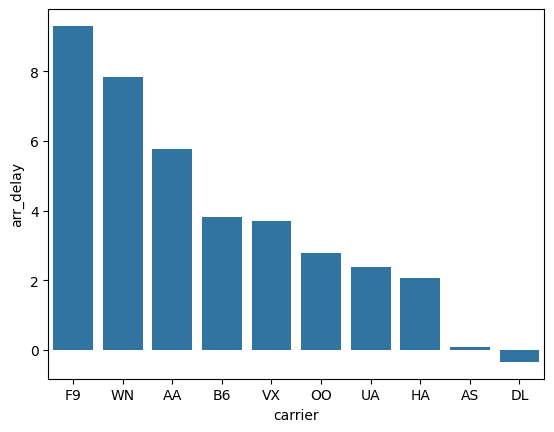

In [80]:
# Average delay by airline
avg_delay = df.groupby('carrier')['arr_delay'].mean().reset_index().sort_values(by='arr_delay', ascending=False)
avg_delay.head()
sns.barplot(x='carrier',y='arr_delay',data=avg_delay.head(10))
plt.show()

## cleaning Data

In [81]:
df.isnull().sum()

,0
year,0
month,0
day,0
dep_time,857
dep_delay,857
arr_time,988
arr_delay,1301
carrier,0
tailnum,248
flight,0


In [103]:
df_cleanded=df.dropna(subset=['arr_time','dep_time','arr_time','arr_delay'])

df_cleanded.isnull().sum()

,0
year,0
month,0
day,0
dep_time,0
dep_delay,0
arr_time,0
arr_delay,0
carrier,0
tailnum,0
flight,0


In [93]:
df_cleanded.shape

(160748, 16)

In [94]:
df.shape

(162049, 16)

## Determining The flight delay which more than 15 times and Features selection

In [107]:
df['is_delayed']=df['arr_delay']>15
features = ['dep_delay', 'distance', 'air_time']
X = df_cleanded[features].dropna()
y = df_cleanded.loc[X.index, 'is_delayed']


## import Machine labraries

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [137]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       False       0.96      0.98      0.97     27320
        True       0.84      0.76      0.80      4830

    accuracy                           0.94     32150
   macro avg       0.90      0.87      0.88     32150
weighted avg       0.94      0.94      0.94     32150



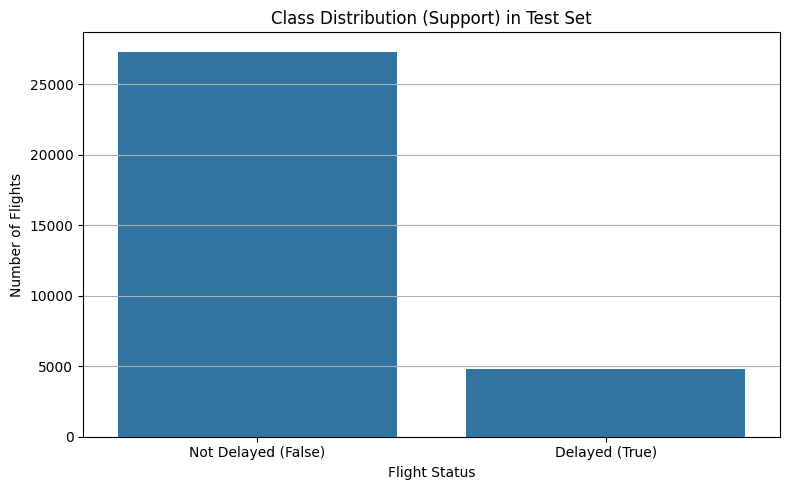

In [147]:


# Step 1: Define support values based on your classification report
support_values = {
    'Not Delayed (False)': 27320,
    'Delayed (True)': 4830
}

# Step 2: Convert to DataFrame for plotting
support_df = pd.DataFrame(list(support_values.items()),columns=['Flight Status','Support'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Flight Status', y='Support', data=support_df)
plt.title('Class Distribution (Support) in Test Set')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Business-Friendly Interpretation:

Our model accurately predicts flight delays with 94% overall accuracy. It’s especially strong at identifying on-time flights (97% F1-score). While slightly less precise on delays (80% F1), it still correctly identifies 76% of all real delays. This model is reliable enough to power delay warnings, customer alerts, or automated rescheduling tools.”

## Creating Dashbord

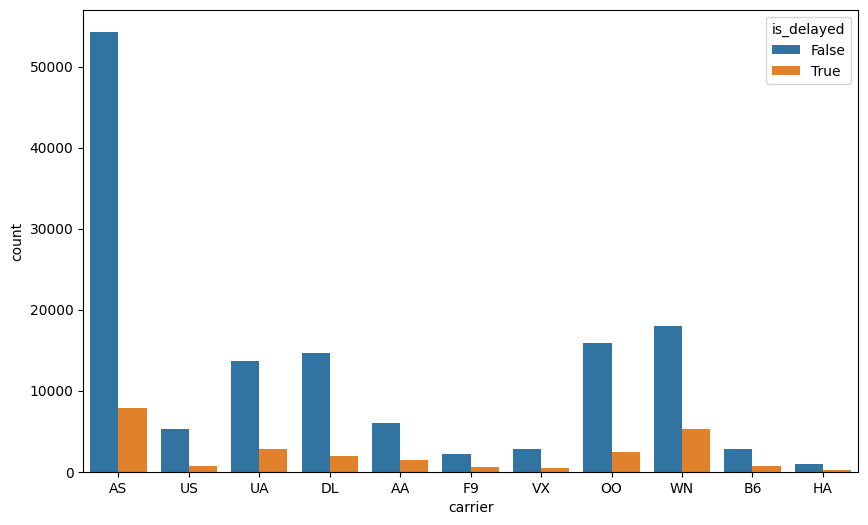

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x='carrier',data=df_cleanded,hue='is_delayed')
plt.show()


In [136]:
top_routes = df_cleanded.groupby(['origin', 'dest'])['arr_delay'].mean().reset_index()
top_routes = top_routes.sort_values(by='arr_delay', ascending=False).head(10)
top_routes.head(10)

,origin,dest,arr_delay
59,SEA,CLE,26.150000
7,PDX,BWI,22.741176
74,SEA,HOU,12.715385
30,PDX,OAK,10.889520
106,SEA,SFO,9.972605
93,SEA,OAK,9.626005
45,PDX,SMF,9.486472
53,SEA,BLI,8.673913
42,PDX,SFO,7.220629
78,SEA,JFK,6.402726
